In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import importlib

from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_colwidth', None)

from sitecustomize import ROOT # lib này được khởi tạo ban đầu dự án

import helpers.view as view
import helpers.EDA as EDA

importlib.reload(view)
importlib.reload(EDA)

<module 'helpers.EDA' from 'd:\\Data Science\\helpers\\EDA.py'>

# bureau balance

In [2]:
bureau_balance = pd.read_pickle(ROOT + "/data/pkl/bureau_balance.p")

In [3]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
99920,5041336,-47,X
99921,5041336,-48,X
99922,5041336,-49,X
99923,5041336,-50,X


In [12]:
des = pd.read_pickle(ROOT + "/data/pkl/description.p")
des_bureau = des[des["Table"] == "bureau_balance"]
des_bureau

,MyUnknownColumn,Table,Row,Description,Special
139,142,bureau_balance,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table,hashed
140,143,bureau_balance,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
141,144,bureau_balance,STATUS,"Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )",NaN


In [13]:
df_info = EDA.df_info(bureau_balance).reset_index()
df_merged = pd.merge(df_info, des_bureau[["Row", "Description", "Special"]], 
                     left_on="index", right_on="Row", how="left").drop(columns=["Row"])
df_merged

Shape: (27299925, 3)


,index,DataType,#Nulls,#Uniques,Min,Mean,Std,Max,top10 val,top10 cnt,top10 ratio,Description,Special
0,SK_ID_BUREAU,int64,0,817395,5001709.000,6036297.333,492348.857,6842888.000,"6255376, 5719281, 6255503, 5017557, 6834163, 6255498, 6356582, 5465462, 5719020, 5719021","97, 97, 97, 97, 97, 97, 97, 97, 97, 97","0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0",NaN,NaN
1,MONTHS_BALANCE,int64,0,97,-96.000,-30.742,23.865,0.000,"-1, -2, -3, 0, -4, -5, -6, -7, -8, -9","622601, 619243, 615080, 610965, 609138, 602663, 594277, 583794, 573566, 563804","0.023, 0.023, 0.023, 0.022, 0.022, 0.022, 0.022, 0.021, 0.021, 0.021",Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
2,STATUS,object,0,8,NaN,NaN,NaN,NaN,"C, 0, X, 1, 5, 2, 3, 4","13646993, 7499507, 5810482, 242347, 62406, 23419, 8924, 5847","0.5, 0.275, 0.213, 0.009, 0.002, 0.001, 0.0, 0.0","Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )",NaN


<Axes: >

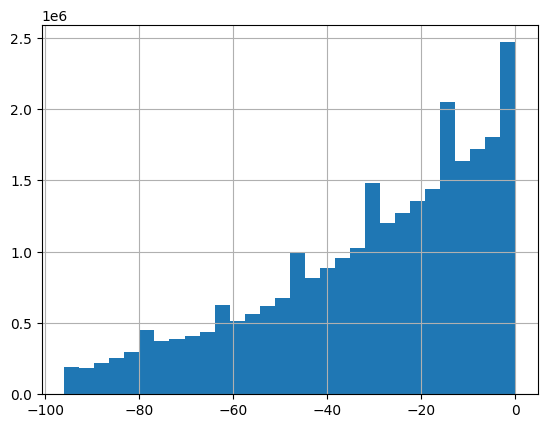

In [15]:
bureau_balance["MONTHS_BALANCE"].hist(bins=30)